# Analyzing Telco Customer Churn

## Import Telco Churn Dataset

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
# import data
df = pd.read_excel('Telco_customer_churn.xlsx')


## Basic Descriptive Analysis
This will help to familiarize with the data / identify missings etc.

In [3]:
# Display the first few rows of the DataFrame to get a glimpse of the data
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [4]:
# Get an overview of the dataset's structure and information: 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [5]:
# Calculate summary statistics for numerical variables:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [6]:
# Check for missing values:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

## Generate demographics distribution plots

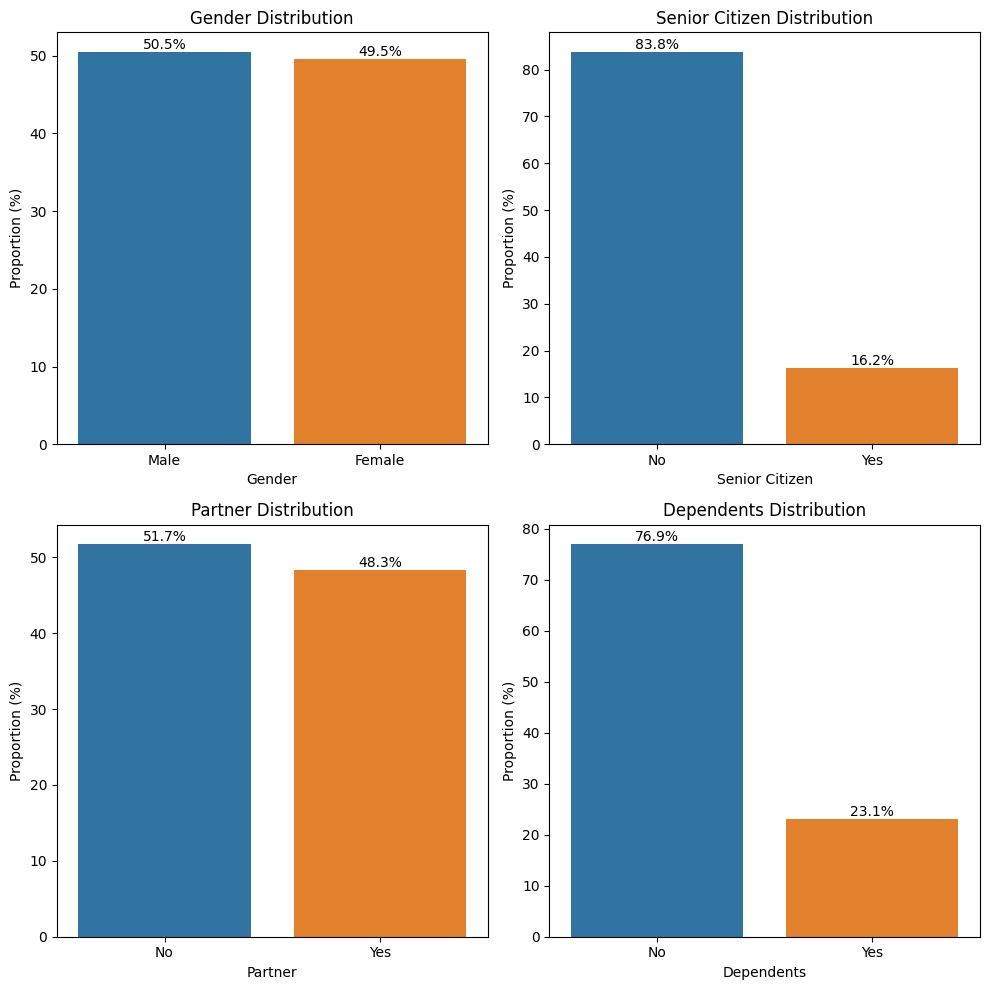

In [7]:
# 2 by 2 descriptive Plots

# Calculate proportions
proportions_gender = df['Gender'].value_counts(normalize=True) * 100
proportions_senior_citizen = df['Senior Citizen'].value_counts(normalize=True) * 100
proportions_partner = df['Partner'].value_counts(normalize=True) * 100
proportions_dependents = df['Dependents'].value_counts(normalize=True) * 100

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Plot Gender distribution with proportions
ax = axes[0, 0]
sns.barplot(x=proportions_gender.index, y=proportions_gender.values, ax=ax)
ax.set_title('Gender Distribution')
ax.set_ylabel('Proportion (%)')
for i, proportion in enumerate(proportions_gender):
    ax.annotate(f'{proportion:.1f}%', (i, proportion), ha='center', va='bottom')

# Plot Senior Citizen distribution with proportions
ax = axes[0, 1]
sns.barplot(x=proportions_senior_citizen.index, y=proportions_senior_citizen.values, ax=ax)
ax.set_title('Senior Citizen Distribution')
ax.set_ylabel('Proportion (%)')
for i, proportion in enumerate(proportions_senior_citizen):
    ax.annotate(f'{proportion:.1f}%', (i, proportion), ha='center', va='bottom')

# Plot Partner distribution with proportions
ax = axes[1, 0]
sns.barplot(x=proportions_partner.index, y=proportions_partner.values, ax=ax)
ax.set_title('Partner Distribution')
ax.set_ylabel('Proportion (%)')
for i, proportion in enumerate(proportions_partner):
    ax.annotate(f'{proportion:.1f}%', (i, proportion), ha='center', va='bottom')

# Plot Dependents distribution with proportions
ax = axes[1, 1]
sns.barplot(x=proportions_dependents.index, y=proportions_dependents.values, ax=ax)
ax.set_title('Dependents Distribution')
ax.set_ylabel('Proportion (%)')
for i, proportion in enumerate(proportions_dependents):
    ax.annotate(f'{proportion:.1f}%', (i, proportion), ha='center', va='bottom')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

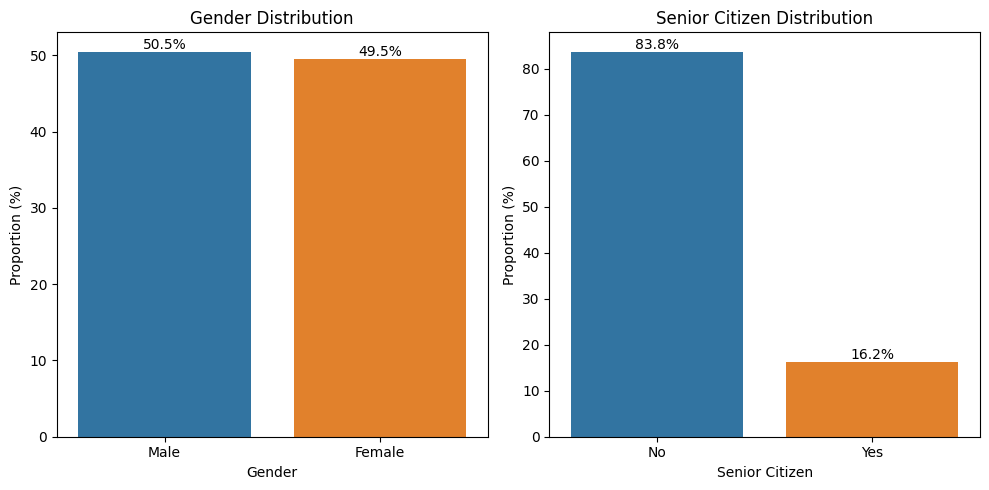

In [8]:
# 1 by 2 descriptive Plots

# Calculate proportions
proportions_gender = df['Gender'].value_counts(normalize=True) * 100
proportions_senior_citizen = df['Senior Citizen'].value_counts(normalize=True) * 100
proportions_partner = df['Partner'].value_counts(normalize=True) * 100
proportions_dependents = df['Dependents'].value_counts(normalize=True) * 100

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot Gender distribution with proportions
ax = axes[0]
sns.barplot(x=proportions_gender.index, y=proportions_gender.values, ax=ax)
ax.set_title('Gender Distribution')
ax.set_ylabel('Proportion (%)')
for i, proportion in enumerate(proportions_gender):
    ax.annotate(f'{proportion:.1f}%', (i, proportion), ha='center', va='bottom')

# Plot Senior Citizen distribution with proportions
ax = axes[1]
sns.barplot(x=proportions_senior_citizen.index, y=proportions_senior_citizen.values, ax=ax)
ax.set_title('Senior Citizen Distribution')
ax.set_ylabel('Proportion (%)')
for i, proportion in enumerate(proportions_senior_citizen):
    ax.annotate(f'{proportion:.1f}%', (i, proportion), ha='center', va='bottom')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


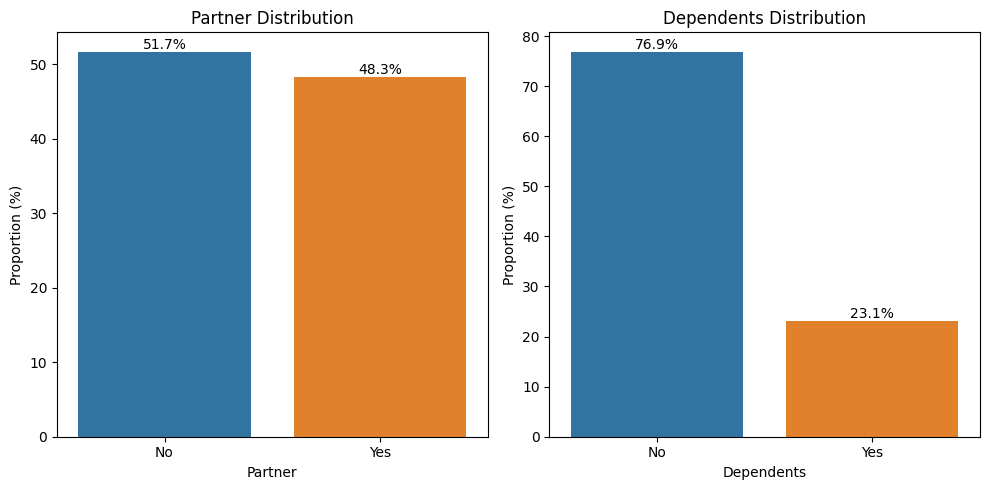

In [9]:
# 1 by 2 descriptive Plots

# Calculate proportions
proportions_gender = df['Gender'].value_counts(normalize=True) * 100
proportions_senior_citizen = df['Senior Citizen'].value_counts(normalize=True) * 100
proportions_partner = df['Partner'].value_counts(normalize=True) * 100
proportions_dependents = df['Dependents'].value_counts(normalize=True) * 100

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot Gender distribution with proportions
ax = axes[0]
sns.barplot(x=proportions_partner.index, y=proportions_partner.values, ax=ax)
ax.set_title('Partner Distribution')
ax.set_ylabel('Proportion (%)')
for i, proportion in enumerate(proportions_partner):
    ax.annotate(f'{proportion:.1f}%', (i, proportion), ha='center', va='bottom')

# Plot Senior Citizen distribution with proportions
ax = axes[1]
sns.barplot(x=proportions_dependents.index, y=proportions_dependents.values, ax=ax)
ax.set_title('Dependents Distribution')
ax.set_ylabel('Proportion (%)')
for i, proportion in enumerate(proportions_dependents):
    ax.annotate(f'{proportion:.1f}%', (i, proportion), ha='center', va='bottom')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

## Explorative Data Analysis

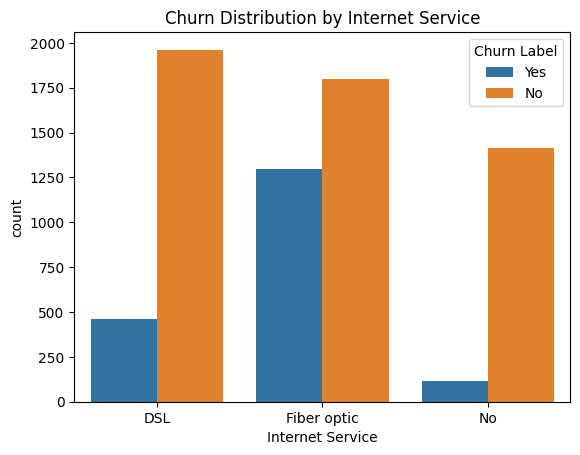

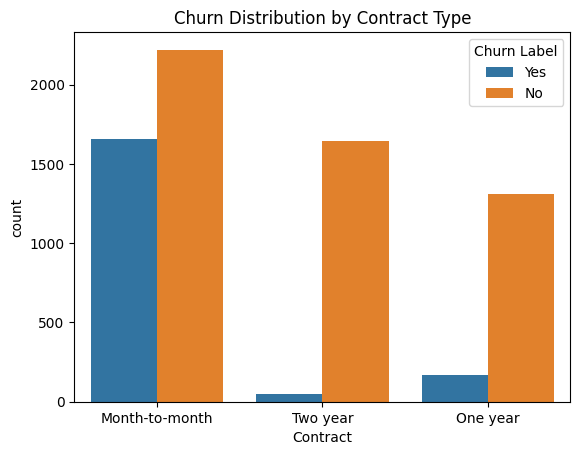

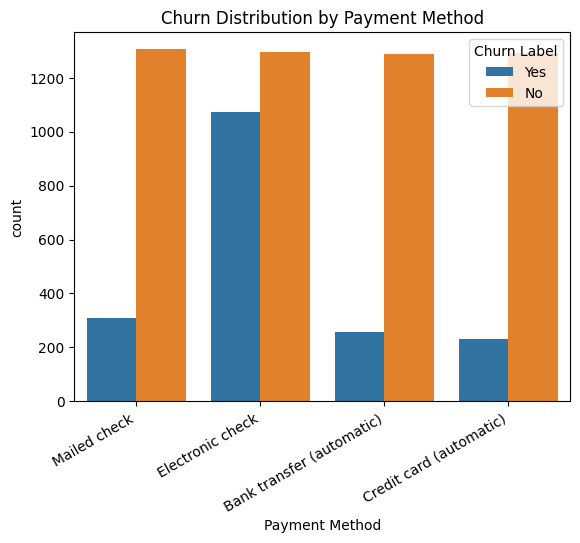

In [10]:
# Plotting Churn distribution by Internet Service
sns.countplot(x='Internet Service', hue='Churn Label', data=df)
plt.title('Churn Distribution by Internet Service')
plt.show()

# Plotting Churn distribution by Contract type
sns.countplot(x='Contract', hue='Churn Label', data=df)
plt.title('Churn Distribution by Contract Type')
plt.show()

# Plotting Churn distribution by Payment Method
ax = sns.countplot(x='Payment Method', hue='Churn Label', data=df)
plt.title('Churn Distribution by Payment Method')
# Adjust x-axis tick label alignment
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
plt.show()

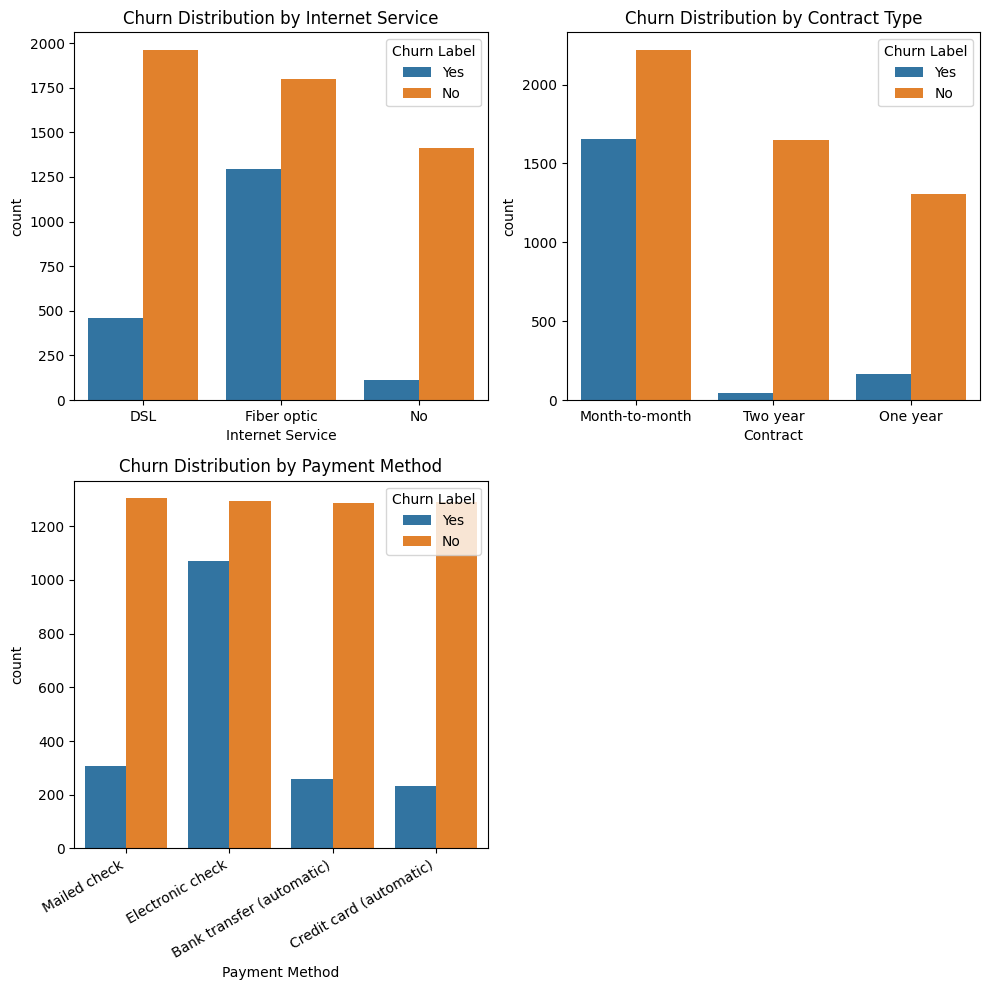

In [11]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Plotting Churn distribution by Internet Service
ax1 = axes[0, 0]
sns.countplot(x='Internet Service', hue='Churn Label', data=df, ax=ax1)
ax1.set_title('Churn Distribution by Internet Service')

# Plotting Churn distribution by Contract type
ax2 = axes[0, 1]
sns.countplot(x='Contract', hue='Churn Label', data=df, ax=ax2)
ax2.set_title('Churn Distribution by Contract Type')

# Plotting Churn distribution by Payment Method
ax3 = axes[1, 0]
sns.countplot(x='Payment Method', hue='Churn Label', data=df, ax=ax3)
ax3.set_title('Churn Distribution by Payment Method')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=30, ha='right')

# Remove empty subplot
axes[1, 1].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

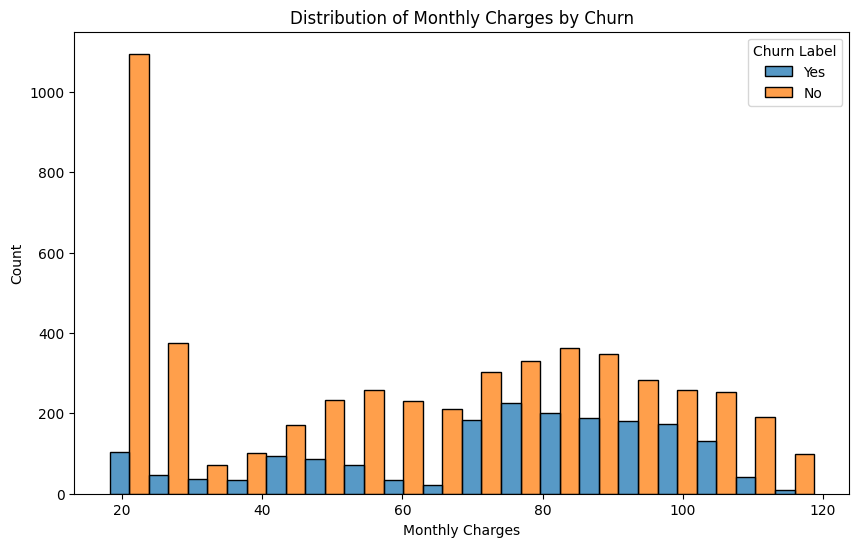

In [12]:
# Plotting Monthly Charges distribution by Churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Monthly Charges', hue='Churn Label', multiple='dodge', kde=False)
plt.title('Distribution of Monthly Charges by Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.show()

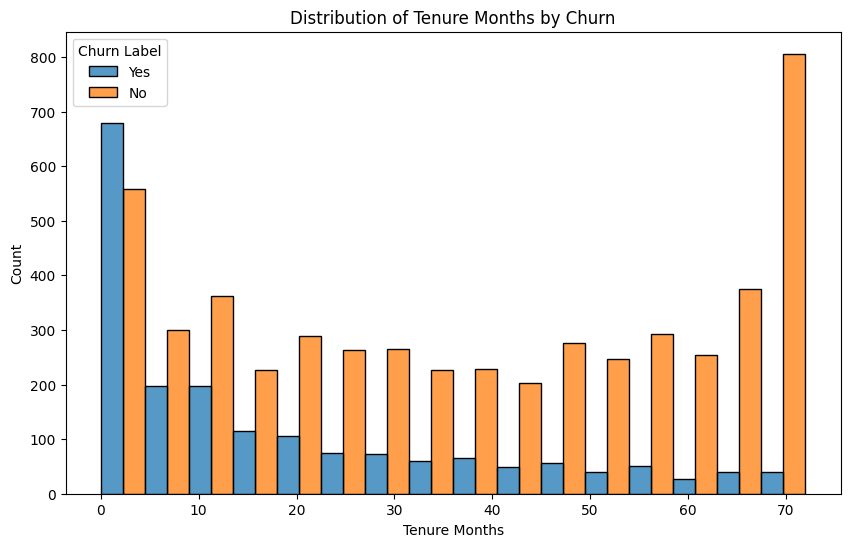

In [13]:
# Plotting Tenure Months distribution by Churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Tenure Months', hue='Churn Label', multiple='dodge', kde=False)
plt.title('Distribution of Tenure Months by Churn')
plt.xlabel('Tenure Months')
plt.ylabel('Count')
plt.show()


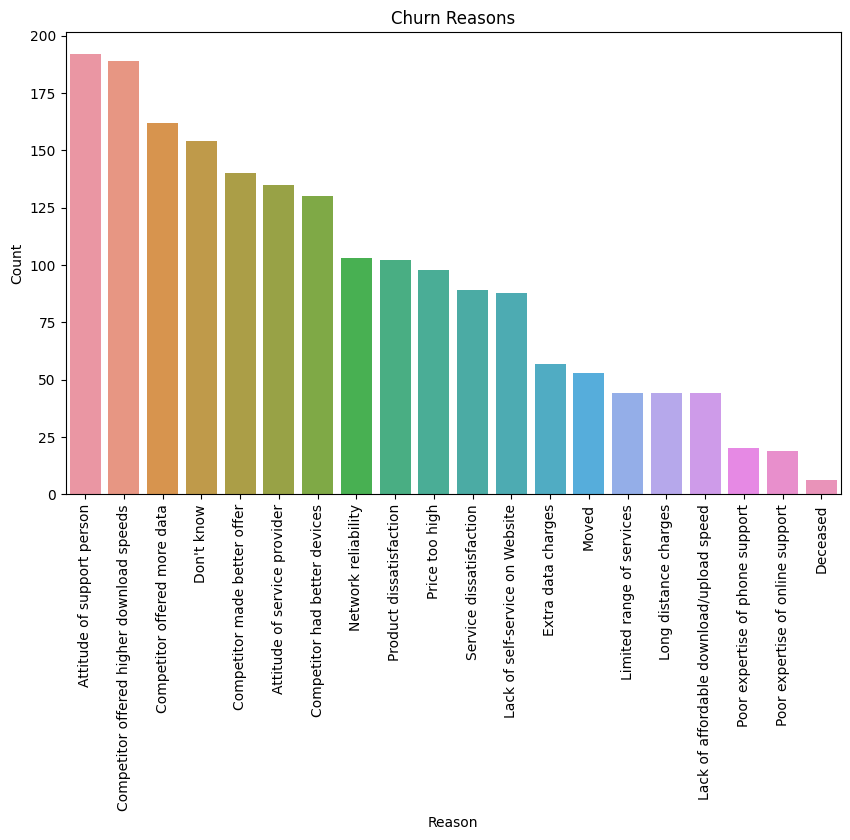

In [14]:
# Plotting the count of churn reasons
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Churn Reason', order=df['Churn Reason'].value_counts().index)
plt.title('Churn Reasons')
plt.xlabel('Reason')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [15]:
# Select the categorical columns for dummy coding
categorical_columns = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Churn Label']


# Print the unique values of each categorical variable
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")


Unique values in Gender: ['Male' 'Female']
Unique values in Senior Citizen: ['No' 'Yes']
Unique values in Partner: ['No' 'Yes']
Unique values in Dependents: ['No' 'Yes']
Unique values in Phone Service: ['Yes' 'No']
Unique values in Multiple Lines: ['No' 'Yes' 'No phone service']
Unique values in Internet Service: ['DSL' 'Fiber optic' 'No']
Unique values in Online Security: ['Yes' 'No' 'No internet service']
Unique values in Online Backup: ['Yes' 'No' 'No internet service']
Unique values in Device Protection: ['No' 'Yes' 'No internet service']
Unique values in Tech Support: ['No' 'Yes' 'No internet service']
Unique values in Streaming TV: ['No' 'Yes' 'No internet service']
Unique values in Streaming Movies: ['No' 'Yes' 'No internet service']
Unique values in Contract: ['Month-to-month' 'Two year' 'One year']
Unique values in Paperless Billing: ['Yes' 'No']
Unique values in Payment Method: ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Unique v

In [16]:
# Select the categorical columns to convert to numeric values
categorical_columns = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Paperless Billing']

# Create a new DataFrame to store the encoded numeric values
df_numeric = df.copy()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Convert the selected categorical columns to numeric values
for column in categorical_columns:
    df_numeric[column] = label_encoder.fit_transform(df_numeric[column])


In [17]:
df_numeric.select_dtypes(include='number')

,Count,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Churn Value,Churn Score,CLTV
0,1,90003,33.964131,-118.272783,1,0,0,0,2,1,1,53.85,1,86,3239
1,1,90005,34.059281,-118.307420,0,0,0,1,2,1,1,70.70,1,67,2701
2,1,90006,34.048013,-118.293953,0,0,0,1,8,1,1,99.65,1,86,5372
3,1,90010,34.062125,-118.315709,0,0,1,1,28,1,1,104.80,1,84,5003
4,1,90015,34.039224,-118.266293,1,0,0,1,49,1,1,103.70,1,89,5340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,92285,34.341737,-116.539416,0,0,0,0,72,1,1,21.15,0,45,5306
7039,1,92301,34.667815,-117.536183,1,0,1,1,24,1,1,84.80,0,59,2140
7040,1,92304,34.559882,-115.637164,0,0,1,1,72,1,1,103.20,0,71,5560
7041,1,92305,34.167800,-116.864330,0,0,1,1,11,0,1,29.60,0,59,2793


In [18]:
# Create Dataframe for Heatmap

# mutate Total Charges
df_numeric['Total Charges'] = pd.to_numeric(df_numeric['Total Charges'], errors='coerce')

df_numeric = df_numeric.select_dtypes(include='number')
# List of variables to exclude
exclude_variables = ['Count', 'Zip Code', 'Latitude', 'Longitude', 'Churn Score', 'CLTV']

# Create a new DataFrame excluding the specified variables
df_numeric = df_numeric.drop(exclude_variables, axis=1)

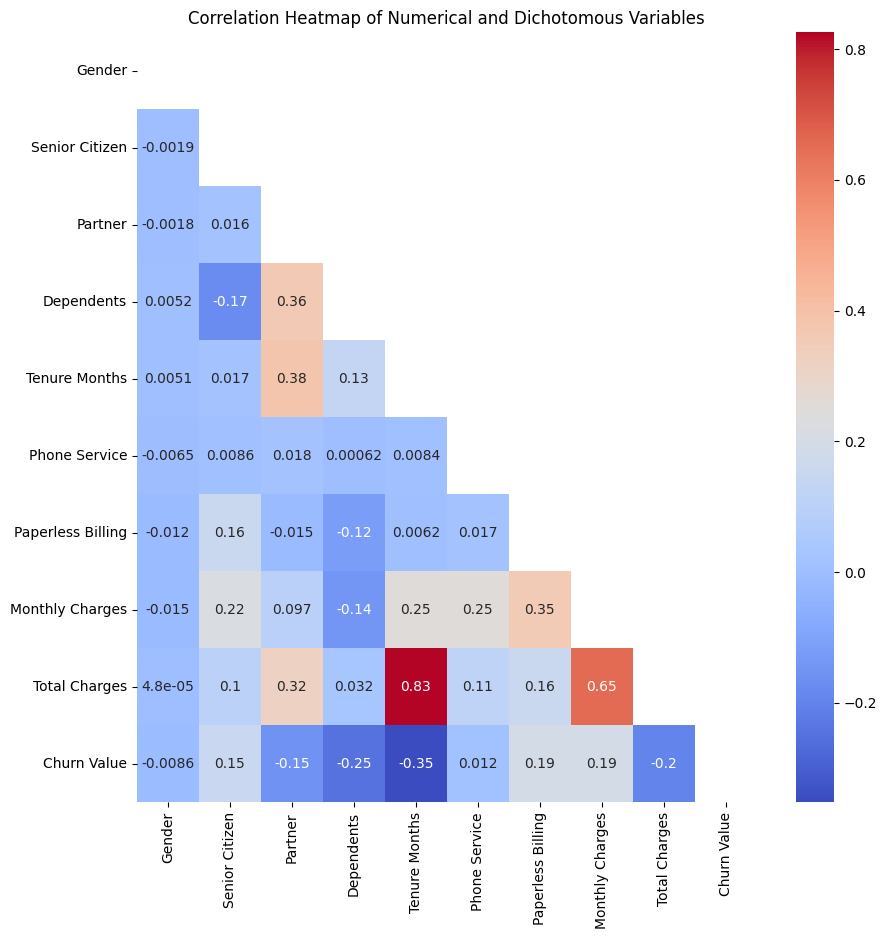

In [19]:
# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap with the mask to show only the lower triangle
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical and Dichotomous Variables")
plt.show()
